In [1]:
import netCDF4 as nc
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [2]:
# u and v wind files
u_ds=xr.open_dataset('ua_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_198001-201412.nc')
v_ds=xr.open_dataset('va_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_198001-201412.nc')


In [3]:
# selecting the u and v components
ua=u_ds['ua'][:]
va=v_ds['va'][:]

In [10]:
# calculating wind speed
ws=np.sqrt(ua**2+va**2)
ws

<xarray.DataArray (time: 420, plev: 19, lat: 180, lon: 288)>
array([[[[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [ 1.7167255 ,  1.7050915 ,  1.6944087 , ...,  1.757035  ,
           1.7427274 ,  1.7292807 ],
         [ 1.5240419 ,  1.51619   ,  1.5089374 , ...,  1.551112  ,
           1.5415115 ,  1.5324851 ],
         [ 1.2758335 ,  1.267709  ,  1.2597123 , ...,  1.3009511 ,
           1.292457  ,  1.2840837 ]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
...
         [28.527884  , 28.529757  , 28.543707  , ..., 28.591248  ,
          28.558977  , 28.537737  ],
         [29.872766  , 29.899357  , 29.937117  , ..., 29.85981   ,
          29.85302   , 29.857328  ],
         [28.487131  , 28.370218  , 28.257282  , ..., 28.861225  ,
          28.732685  , 28.60797   ]],

        [[ 0.50865865,  0.50409436,  0.50001556, ...,  0.5251312 ,
           0.51919115,  0.51369554],
         [ 0.593863  ,  0.57207096,  0.5508738 , ...,  0.662042  ,
           0.6389152 ,  0.6161682 ],
         [ 1.8751758 ,  1.8616787 ,  1.848487  , ...,  1.9173249 ,
           1.9030156 ,  1.8889605 ],
         ...,
         [30.403206  , 30.411318  , 30.433264  , ..., 30.458534  ,
          30.427162  , 30.408604  ],
         [31.150526  , 31.17296   , 31.207249  , ..., 31.154259  ,
          31.141201  , 31.139948  ],
         [29.106464  , 28.986265  , 28.870058  , ..., 29.490505  ,
          29.358635  , 29.230606  ]]]], dtype=float32)
Coordinates:
  * time     (time) object 1980-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0

# Mean wind speed

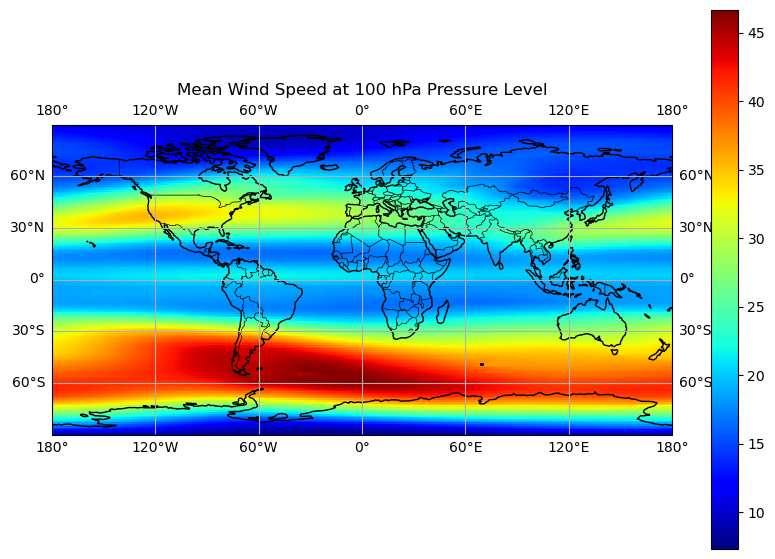

In [12]:
# Create the plot with borders using Cartopy
plt.figure(figsize=(10, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the wind speed data and add coastlines and borders
ws.sel(plev=100).mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='jet')

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Optional: Add gridlines
ax.gridlines(draw_labels=True)

plt.title('Mean Wind Speed at 100 hPa Pressure Level')
plt.show()


# Climatology

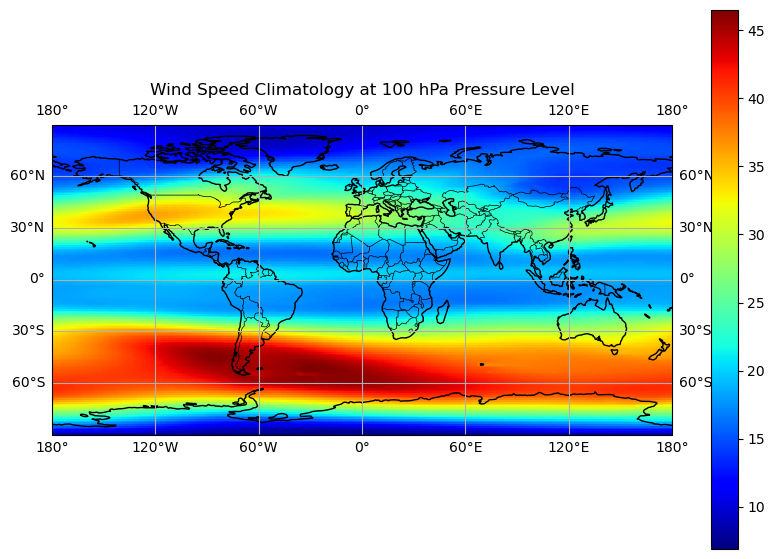

In [14]:
ws_clim = ws.sel(time=slice('1960-01','1989-12')).mean(dim='time')
ws_clim

# Create the plot with borders using Cartopy
plt.figure(figsize=(10, 7))
ax = plt.axes(projection=ccrs.PlateCarree())


ws_clim.sel(plev=100).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='jet')

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Optional: Add gridlines
ax.gridlines(draw_labels=True)

plt.title('Wind Speed Climatology at 100 hPa Pressure Level')
plt.show()


# Anomaly

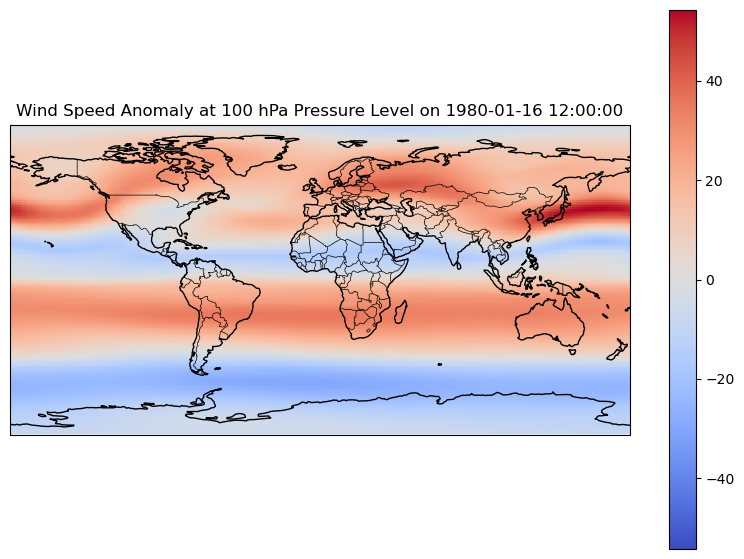

In [18]:
ws_anom= (ws-ws_clim)
ws_anom

# Separate ax for climatology plot and anomaly plot

# Now, create a new figure for the anomaly plot
ws_anom = ws - ws_clim

# Create a new plot for the anomaly
plt.figure(figsize=(10, 7))
ax2 = plt.axes(projection=ccrs.PlateCarree())

ws_anom.sel(plev=100).sel(time='1980-01-16 12:00:00').plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='coolwarm')

# Add coastlines and borders to the anomaly plot
ax2.coastlines()
ax2.add_feature(cfeature.BORDERS, linewidth=0.5)
plt.title('Wind Speed Anomaly at 100 hPa Pressure Level on 1980-01-16 12:00:00')
plt.show()

## Anomaly for a particular location

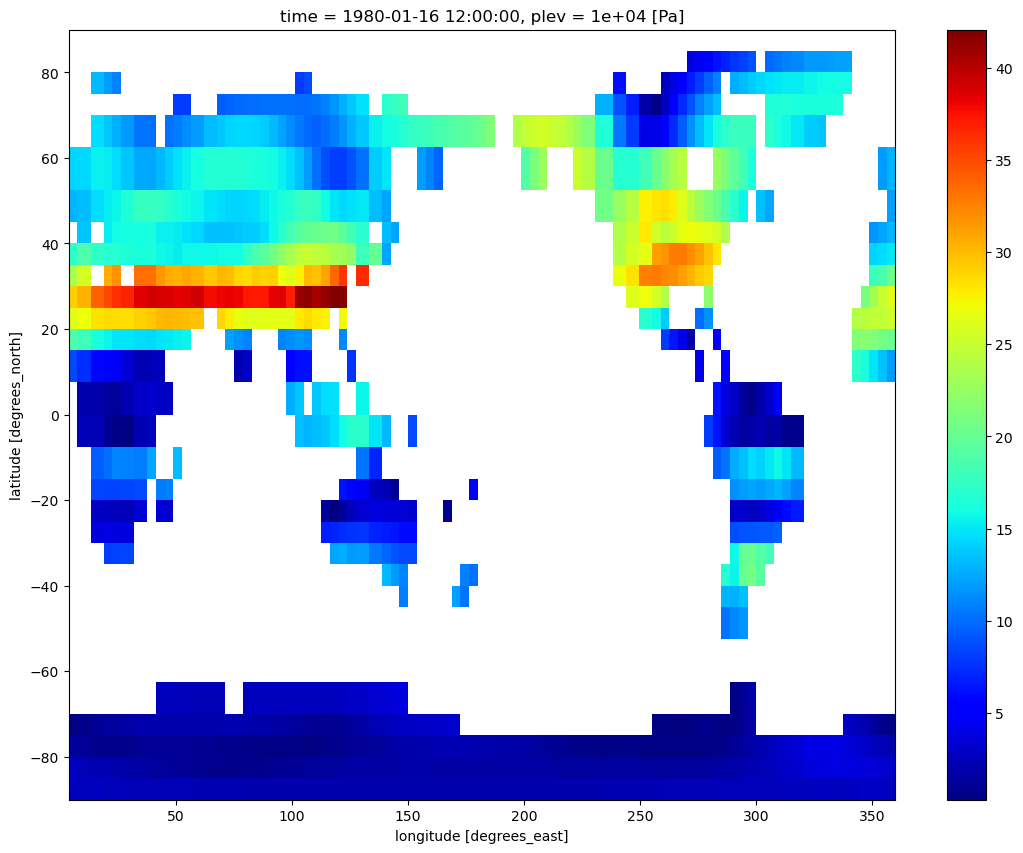

In [20]:
url = 'http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/fx/atmos/fx/r0i0p0/latest/sftlf/sftlf_fx_ACCESS1-3_historical_r0i0p0.nc'
landfrac = xr.open_dataset(url).sftlf

ws.isel(time=0).sel(plev=10000).where(landfrac>0).plot(size=10, cmap='jet');

# Plot wind speed at 3 different latitudes

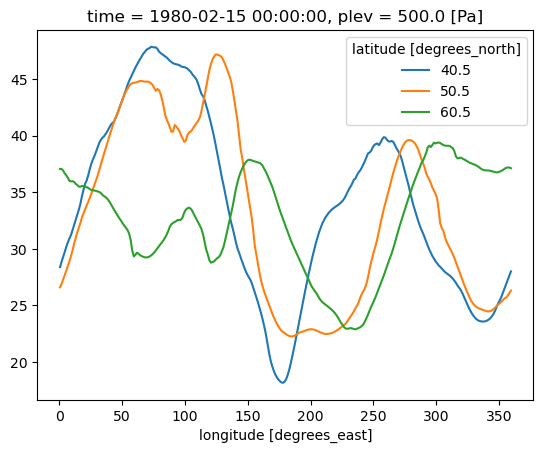

In [21]:
ws.isel(time=1).sel(plev=500).sel(lat=[40, 50, 60], method="nearest").plot(x="lon", hue="lat")


# Plot wind speed at 3 different longitudes

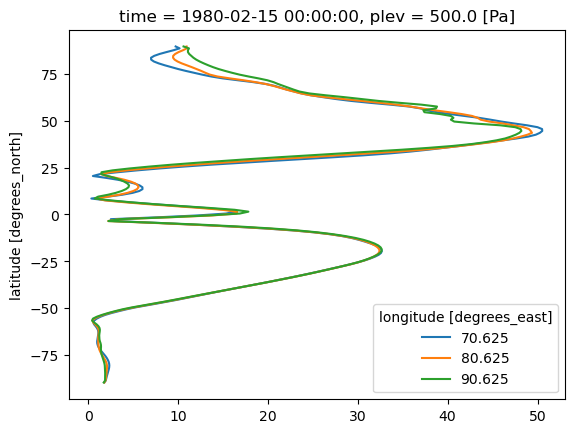

In [22]:
ws.isel(time=1).sel(plev=500).sel(lon=[70, 80,90], method="nearest").plot(y="lat", hue="lon")


# 